In [ ]:
import librosa
import os
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def readAudio(filename):
    x, sr = librosa.load(filename, sr=16000)
    return x, sr

#calculate spectrogram
def calc_spec(x):
    n_fft = 1024
    hop_length = 512
    win_length = 1024
    X = np.abs(librosa.stft(x, n_fft = n_fft, hop_length = hop_length, win_length = win_length, window='hann', dtype = np.clongdouble))
    X = librosa.power_to_db(X**2,ref=np.max)
    return X

def saveSpectrogram(X, outfilename):
    np.save(outfilename+".npy", X)
    return

def readSpectrogram(infilename):
    X = np.load(infilename)
    return X

In [ ]:
music_path = "Music/music_wave/"
speech_path = "Speech/speech_wave/"
silence_path = "Silence/silence_wave/"

In [ ]:
for file in os.listdir(music_path):
    if(file.endswith(".wav")):
        x,sr = readAudio(music_path+file)
        X = calc_spec(x)
        saveSpectrogram(X,"Music/Spectrogram/" + "music" + "_" + file[:-4] + "_")

In [ ]:
for file in os.listdir(speech_path):
    if(file.endswith(".wav")):
        x,sr = readAudio(speech_path+file)
        X = calc_spec(x)
        saveSpectrogram(X,"Speech/Spectrogram/" + "speech" + "_" + file[:-4] + "_")

In [ ]:
for file in os.listdir(silence_path):
    if(file.endswith(".wav")):
        x,sr = readAudio(silence_path+file)
        X = calc_spec(x)
        saveSpectrogram(X,"Silence/Spectrogram/" + "silence" + "_" + file[-6:-4] + "_")

In [ ]:
x,sr = readAudio("/content/drive/MyDrive/mlsp_proj/real world check.wav")

In [ ]:
X = calc_spec(x)
saveSpectrogram(X,"/content/drive/MyDrive/mlsp_proj/real world check"+ "_")

In [ ]:
X.shape

(513, 313)

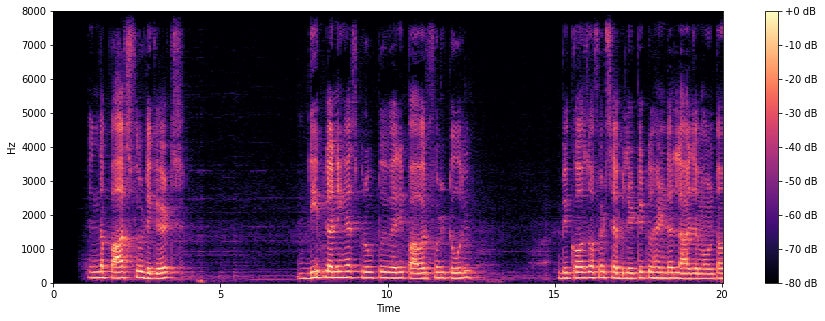

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(X, sr=16000, hop_length=1024, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')